In [241]:
import numpy as numpy
import pandas as pd

In [242]:
df_raw=pd.read_csv('/Users/rudraksh/Desktop/ALL_ML_WORK/campus_x/sample_data/placement.csv')
df=df_raw.copy()

df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [243]:
df.shape

(100, 4)

# Steps
# e. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


As i already created a copy of dataset above df = df_raw.copy() so i can delete or drop the column from data set using df.drop(columns=['Unnamed: 0'], inplace=True) if i didnt made the copy of the code above i could use 2 other ways over here 
1. df = df.drop(columns=[Unnamed: 0]) here implace is by default false so it create or returns a new data set with the column removed and the other way of doingthis could be using i loc
2. df = df.iloc[:,1:] here iloc is used to select rows and columns by integer location this means i want all rows but columns from index 1 to end


In [245]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [246]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [247]:
import matplotlib.pyplot as plt


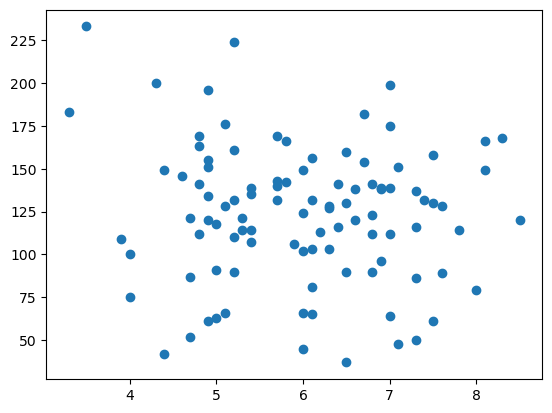

In [248]:
plt.scatter(df['cgpa'], df['iq'])

The scatter plot shows a weak or no linear relationship between CGPA and IQ, indicating that IQ alone does not strongly determine academic performance and that CGPA is influenced by multiple factors.

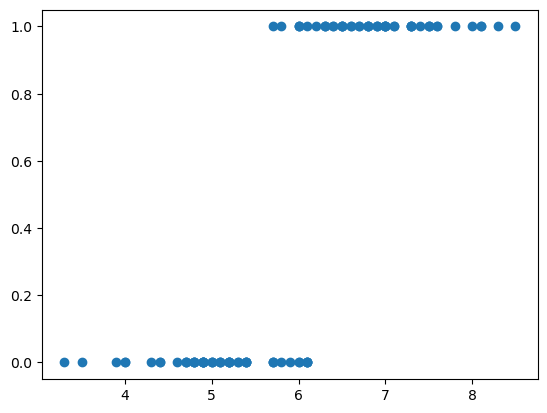

In [249]:
plt.scatter(df['cgpa'],df['placement'])

The scatter plot shows a strong positive relationship between CGPA and placement, indicating that students with higher CGPA have a much higher probability of being placed, though CGPA alone does not guarantee placement.

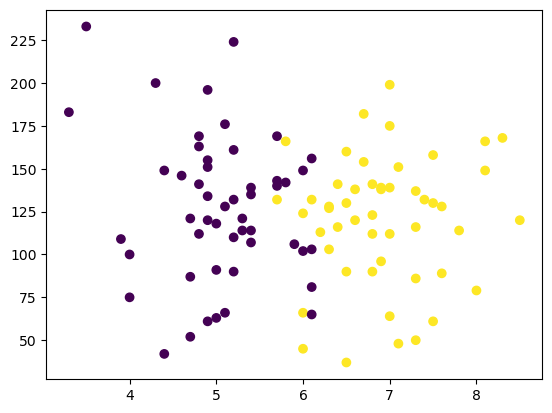

In [250]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

The scatter plot with color encoding shows that CGPA is the primary separating feature, while IQ contributes to separating borderline cases, indicating that placement depends on a combination of factors rather than a single variable.
now got it why cgpa was not the alone factor here students with same cgpa but diffrent iq got different results

In [251]:
df['cgpa'].corr(df['iq'])


-0.0987906720582117

What this means

Very close to 0

Slightly negative, but negligible

Interpretation (important)

CGPA and IQ have almost no linear relationship.

In real terms:

High IQ ≠ high CGPA

Low IQ ≠ low CGPA

They are basically independent

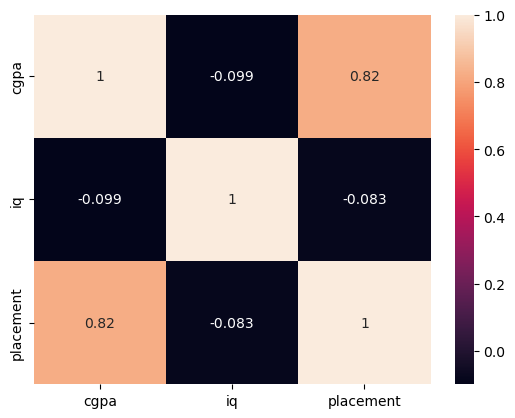

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[['cgpa', 'iq', 'placement']].corr(), annot=True)
plt.show()


corr(cgpa, placement) = 0.82
What this means

Strong positive correlation

Very close to +1

Interpretation

Higher CGPA strongly increases the chance of placement.

In real terms:

Students with higher CGPA are much more likely to be placed

CGPA is a very powerful predictor



corr(iq, placement) = -0.083
What this means

Very close to 0

Slight negative, but meaningless

Interpretation

IQ alone does NOT decide placement.

In real terms:

High IQ does not guarantee placement

Low IQ does not prevent placement

IQ might help only in combination, not alone

The correlation matrix shows that CGPA has a strong positive linear relationship with placement, making it a key predictor. IQ shows little linear correlation with either CGPA or placement, suggesting it does not independently determine outcomes but may still contribute in combination with other features.

=====================================================================================
Now splitting the data in input and output coulumns
=====================================================================================

In [253]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [254]:
X


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [255]:
Y 

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [256]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=  train_test_split(X,Y,test_size = 0.10)

In [257]:
x_train

,cgpa,iq
87,5.7,132.0
65,8.1,166.0
29,7.0,112.0
78,6.1,81.0
74,6.7,154.0
...,...,...
77,7.3,50.0
18,4.0,100.0
51,4.8,141.0
57,6.5,130.0


In [258]:
y_train

87    1
65    1
29    1
78    0
74    1
     ..
77    1
18    0
51    0
57    1
23    0
Name: placement, Length: 90, dtype: int64

In [259]:
x_test

,cgpa,iq
66,6.9,96.0
21,7.1,151.0
14,6.1,103.0
12,5.4,139.0
0,6.8,123.0
73,4.9,61.0
5,7.1,48.0
71,6.1,132.0
27,6.0,124.0
48,6.6,138.0


In [260]:
y_test

66    1
21    1
14    0
12    0
0     1
73    0
5     1
71    1
27    1
48    1
Name: placement, dtype: int64

In [261]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train






array([[-0.21910661,  0.17590041],
       [ 1.82968251,  1.02088513],
       [ 0.89065416, -0.32114942],
       [ 0.12235824, -1.09157666],
       [ 0.63455552,  0.72265523],
       [-0.81667011, -0.84305174],
       [ 0.46382309,  0.87177018],
       [-0.98740253,  0.94632765],
       [-2.09716331,  2.68600206],
       [ 1.74431629, -1.14128164],
       [ 1.1467528 , -0.9673142 ],
       [ 0.29309067,  0.05163795],
       [ 0.89065416,  1.84101735],
       [ 0.37845688,  0.39957284],
       [ 0.71992173,  0.39957284],
       [ 1.40285144,  0.07649045],
       [ 0.03699203, -1.98626636],
       [ 0.03699203, -1.46436403],
       [ 0.03699203, -0.56967434],
       [ 0.03699203,  0.59839277],
       [-0.73130389,  0.07649045],
       [-0.47520525, -0.27144444],
       [ 0.89065416,  1.24455755],
       [-0.81667011, -1.53892151],
       [-0.90203632,  1.76645988],
       [-0.98740253, -0.32114942],
       [-0.21910661,  1.0954426 ],
       [ 1.23211901,  0.17590041],
       [ 0.12235824,

In [262]:
x_test = scaler.transform(x_test)

StandardScaler scales features by subtracting the mean and dividing by the standard deviation, so each feature has zero mean and unit variance. This ensures all features are on the same scale and prevents any one feature from dominating the model.

on what basis
It uses statistics from the training data — the mean and standard deviation of each feature — and transforms values based on how far they are from the average.

We fit preprocessing steps only on training data to avoid data leakage. If test data statistics are used during fitting, information from the test set leaks into training, leading to overly optimistic and unrealistic model performance.

In [263]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# model training
model.fit(x_train, y_train)


LogisticRegression()

In [264]:
y_pred=model.predict(x_test)

In [265]:
y_test

66    1
21    1
14    0
12    0
0     1
73    0
5     1
71    1
27    1
48    1
Name: placement, dtype: int64

In [266]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.8

In [267]:
print(y_train.value_counts())
print(y_test.value_counts())


placement
0    47
1    43
Name: count, dtype: int64
placement
1    7
0    3
Name: count, dtype: int64


In [268]:
from sklearn.metrics import accuracy_score

print("Train acc:", accuracy_score(y_train, model.predict(x_train)))
print("Test acc :", accuracy_score(y_test, model.predict(x_test)))


Train acc: 0.9333333333333333
Test acc : 0.8


In [269]:
# from mlxtend.plotting import plot_decision_regions

# plot_decision_regions(x_train.values, y_train.values, model=svm,legend=2)


In [270]:
import pickle

In [271]:
pickle.dump(model,open('model.pkl','wb'))

not workin g irght now due to depenedency war will sort it out later on
